# Introduction to Dataset

This dataset encompasses credit card transactions executed by European cardholders during a two-day period in September 2013. Comprising 284,807 transactions, it presents a highly imbalanced class distribution with only 492 (0.172%) instances of fraudulent activity.

To protect sensitive information, the original features have been subjected to Principal Component Analysis (PCA), resulting in numerical variables labeled V1 to V28. The sole exceptions are 'Time' and 'Amount'. 'Time' records the elapsed seconds since the dataset's initial transaction, while 'Amount' represents the transaction value. The latter can be utilized for cost-sensitive learning strategies.

The target variable, 'Class', is binary: 1 indicates a fraudulent transaction, and 0 denotes a legitimate one.


# Import Libraries

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline

In [35]:
#loading the data
df_credit = pd.read_csv("/content/creditcard.csv")

In [36]:
df_credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [37]:
df_credit.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [38]:
#looking the type and searching for null values
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [39]:
df_credit[["Time","Amount","Class"]].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


# EDA

I will explore the below

- Time
- Amount
- Class

## Analysing Class

In [40]:
df_credit['Class'].value_counts()

,count
Class,
0,284315
1,492


Distribuition of Normal(0) and Frauds(1): 


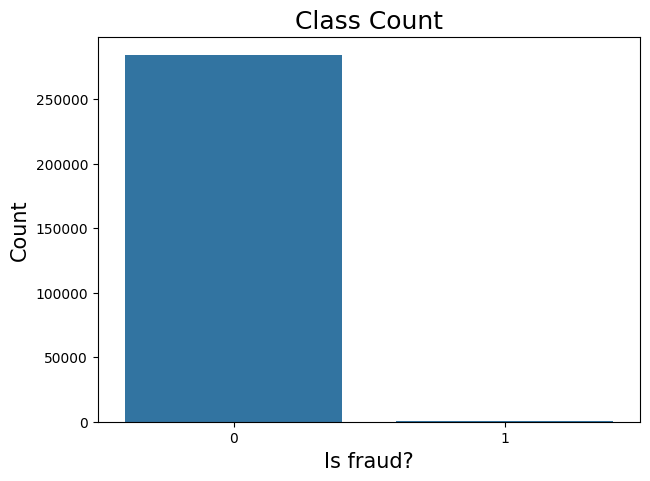

In [41]:
#Lets start looking the difference by Normal and Fraud transactions
print("Distribuition of Normal(0) and Frauds(1): ")

plt.figure(figsize=(7,5))
sns.countplot(x="Class", data=df_credit)
plt.title("Class Count", fontsize=18)
plt.xlabel("Is fraud?", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

We have a clearly imbalanced data.<br>
It's very common when treating of frauds... <br>

<b>First</b> I will do some explore through the Time and Amount. <br>
<b>Second</b> I will explore the V's Features, that are PCA's

## Analysing Time


In [42]:
timedelta = pd.to_timedelta(df_credit['Time'], unit='s')
df_credit['Time_min'] = (timedelta.dt.components.minutes).astype(int)
df_credit['Time_hour'] = (timedelta.dt.components.hours).astype(int)

(-1.0, 25.0)

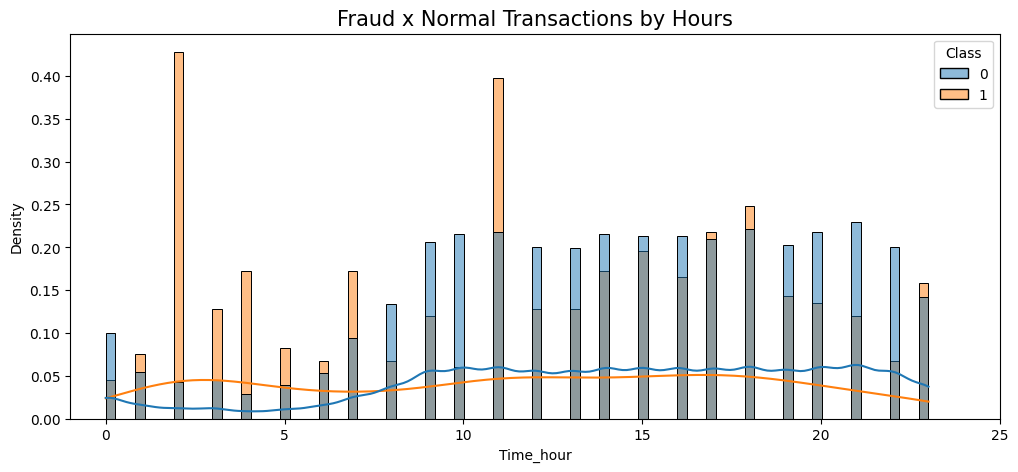

In [43]:
#Exploring the distribuition by Class types through hours
plt.figure(figsize=(12,5))
sns.histplot(data=df_credit, x="Time_hour", hue="Class", stat="density", common_norm=False, kde=True)
plt.title('Fraud x Normal Transactions by Hours', fontsize=15)
plt.xlim([-1,25])

(-1.0, 61.0)

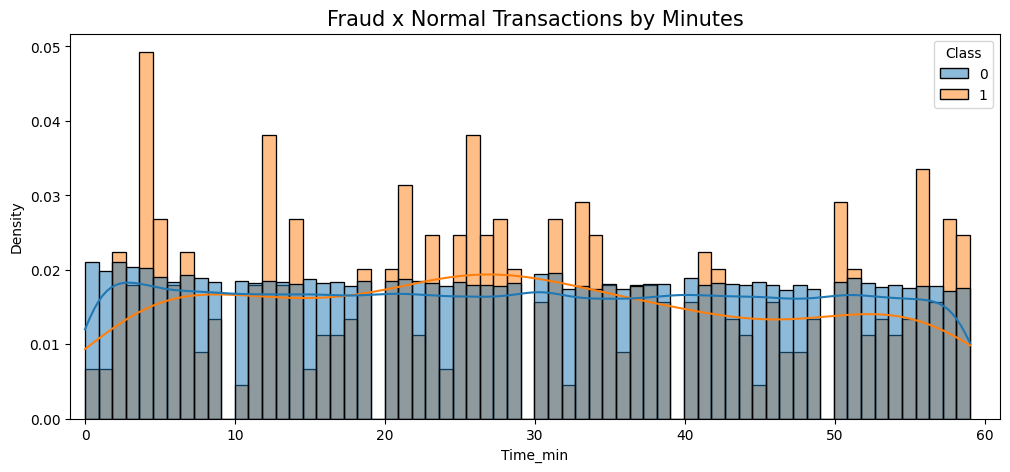

In [44]:
#Exploring the distribuition by Class types through minutes
plt.figure(figsize=(12,5))
sns.histplot(data=df_credit, x="Time_min", hue="Class", stat="density", common_norm=False, kde=True)
plt.title('Fraud x Normal Transactions by Minutes', fontsize=15)
plt.xlim([-1,61])

## Analysing Amount

In [45]:
#To clearly the data of frauds and no frauds
df_fraud = df_credit[df_credit['Class'] == 1]
df_normal = df_credit[df_credit['Class'] == 0]

#Calculate additional statistics
fraud_stats = df_fraud["Amount"].describe()
normal_stats = df_normal["Amount"].describe()

#Print the statistics
print("Fraud transaction statistics")
print(fraud_stats)
print("\nNormal transaction statistics")
print(normal_stats)


Fraud transaction statistics
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal transaction statistics
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


In [46]:
#Feature engineering to a better visualization of the values
df_credit['Amount_log'] = np.log(df_credit.Amount + 0.01)

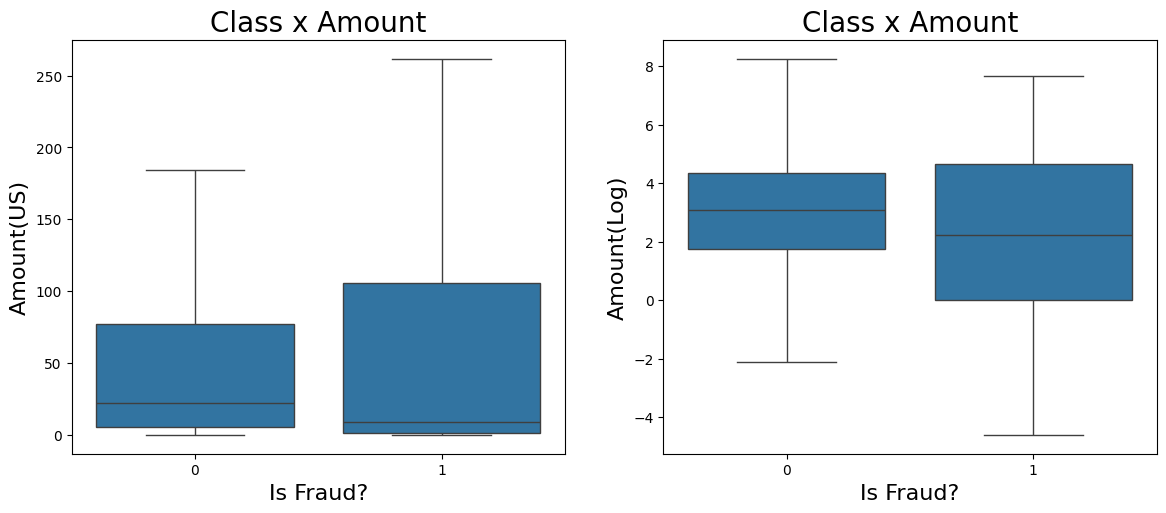

In [47]:
plt.figure(figsize=(14,6))
#I will explore the Amount by Class and see the distribuition of Amount transactions
plt.subplot(121)
ax = sns.boxplot(x ="Class",y="Amount", data=df_credit, showfliers=False) # Added showfliers to remove outliers for better visualization
ax.set_title("Class x Amount", fontsize=20)
ax.set_xlabel("Is Fraud?", fontsize=16)
ax.set_ylabel("Amount(US)", fontsize = 16)

plt.subplot(122)
ax1 = sns.boxplot(x ="Class",y="Amount_log", data=df_credit, showfliers=False) # Added showfliers to remove outliers for better visualization
ax1.set_title("Class x Amount", fontsize=20)
ax1.set_xlabel("Is Fraud?", fontsize=16)
ax1.set_ylabel("Amount(Log)", fontsize = 16)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

There is a slight difference in the log amount between the two classes. The interquartile range (IQR) of fraudulent transactions is higher than that of normal transactions, but normal transactions have the highest values.

### Scatter plot (Time (min) vs Amount)

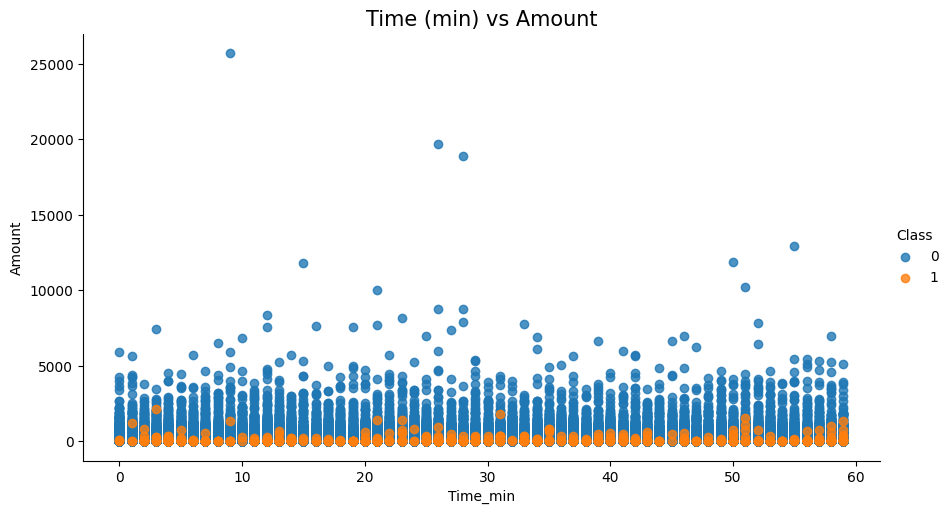

In [48]:
#Looking the Amount and time distribuition of FRAUD transactions
ax = sns.lmplot(y="Amount", x="Time_min", fit_reg=False,aspect=1.8,
                data=df_credit, hue='Class')
plt.title("Time (min) vs Amount",fontsize=15)
plt.show()

### Scatter plot (Time(hour) vs Amount)

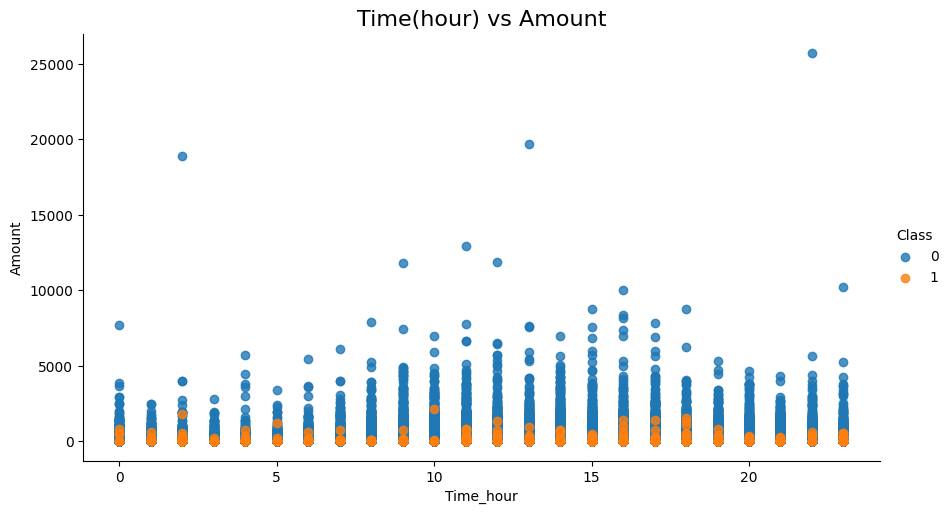

In [49]:
ax = sns.lmplot(y="Amount", x="Time_hour", fit_reg=False,aspect=1.8,
                data=df_credit, hue='Class')
plt.title("Time(hour) vs Amount", fontsize=16)

plt.show()

## Distribution Plot


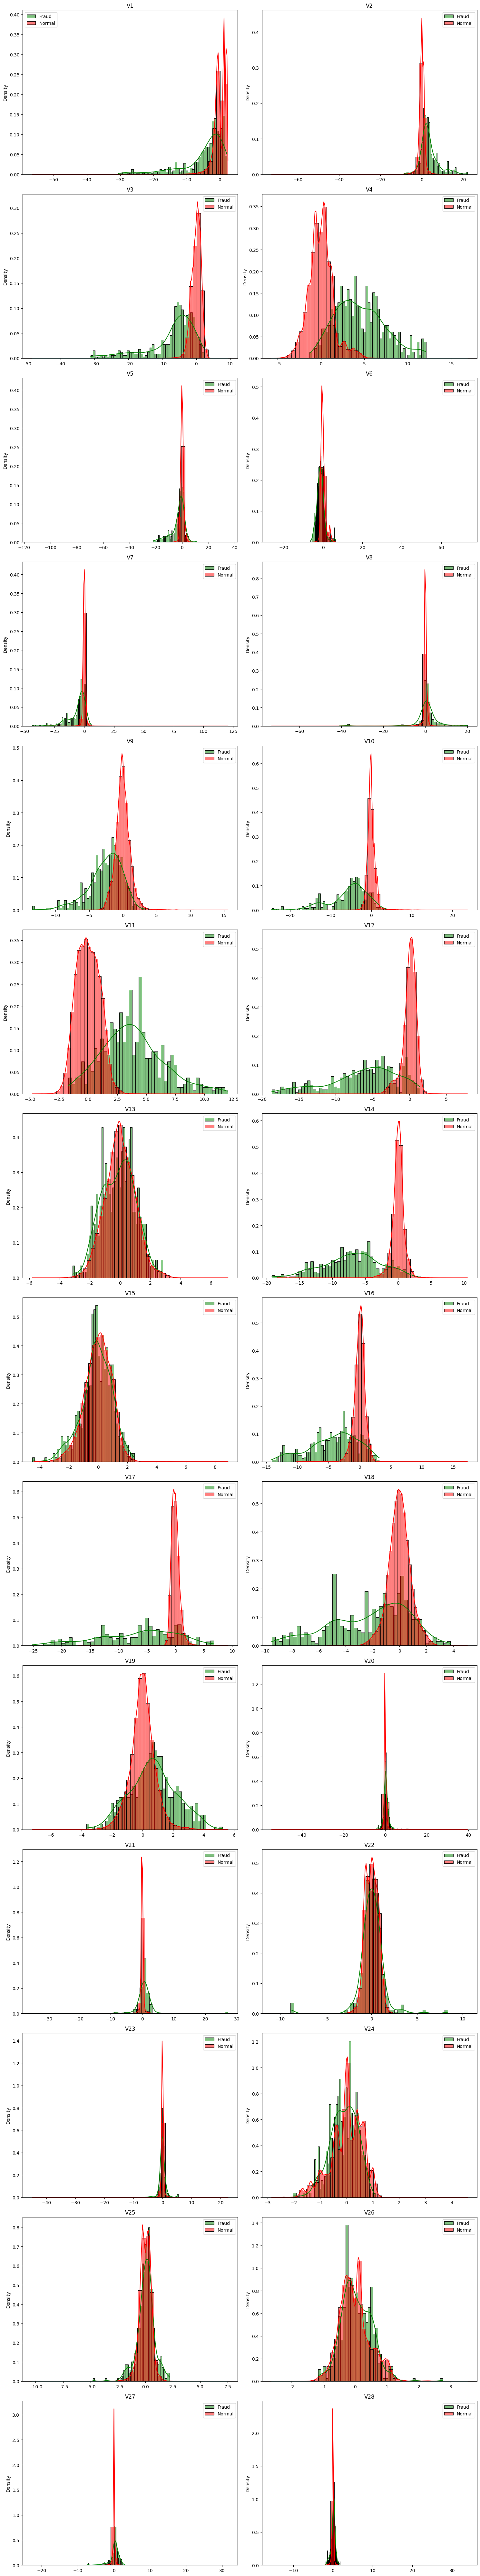

In [50]:
columns = df_credit.iloc[:,1:29].columns

frauds = df_credit.Class == 1
normals = df_credit.Class == 0

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(15,20*4))

# Iterate through the columns and create distribution plots
for n, col in enumerate(df_credit[columns]):
    ax = plt.subplot(grid[n])

    # Plot distribution for fraudulent transactions
    sns.histplot(df_credit[col][frauds], bins=50, color='g',
                 label='Fraud', kde=True, stat="density", common_norm=False)

    # Plot distribution for normal transactions
    sns.histplot(df_credit[col][normals], bins=50, color='r',
                 label='Normal', kde=True, stat="density", common_norm=False)

    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
    ax.legend() # add a legend to distinguish the distributions

plt.tight_layout() # Adjust layout to prevent overlapping

# Feature selections

In [51]:
#I will select the variables where fraud class have a interesting behavior and might can help us predict

df_credit = df_credit[["Time_hour","Time_min","V2","V3","V4","V9","V10","V11","V12","V14","V16","V17","V18","V19","V27","Amount","Class"]]

# Feature Engineering

In [52]:
df_credit.Amount = np.log(df_credit.Amount + 0.001)

<ipython-input-52-e4a9ffef1821>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_credit.Amount = np.log(df_credit.Amount + 0.001)


In [53]:
#Looking the final df
df_credit.head()

,Time_hour,Time_min,V2,V3,V4,V9,V10,V11,V12,V14,V16,V17,V18,V19,V27,Amount,Class
0,0,0,-0.072781,2.536347,1.378155,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,0.133558,5.008105,0
1,0,0,0.266151,0.166480,0.448154,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.008983,0.989913,0
2,0,0,-1.340163,1.773209,0.379780,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,-0.055353,5.936641,0
3,0,0,-0.185226,1.792993,-0.863291,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,0.062723,4.816249,0
4,0,0,0.877737,1.548718,0.403034,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,0.219422,4.248367,0


Text(0.5, 1.05, 'Correlation Matrix')

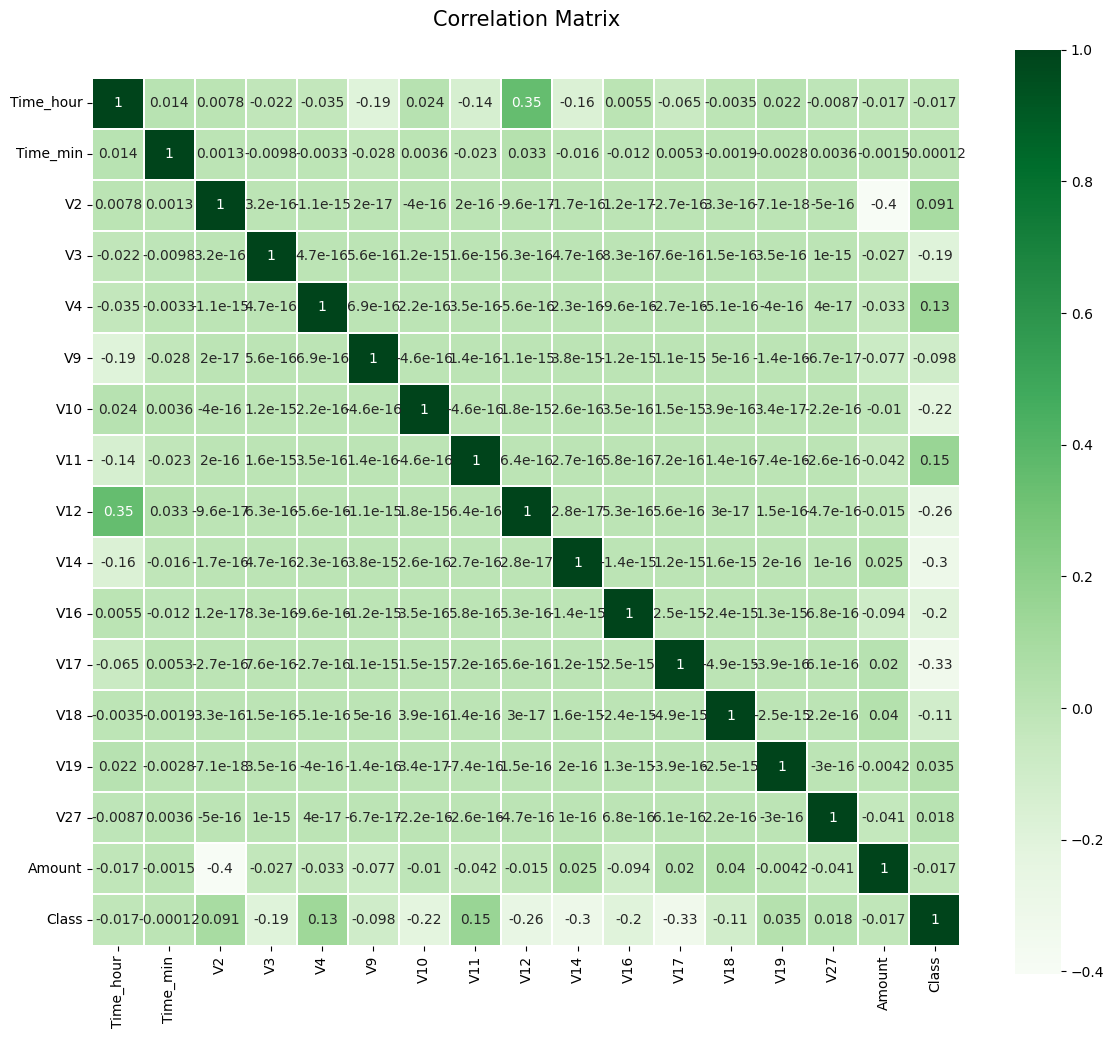

In [54]:
colormap = plt.cm.Greens

plt.figure(figsize=(14,12))

sns.heatmap(df_credit.corr(),linewidths=0.1,vmax=1.0,
            square=True, cmap = colormap, linecolor='white', annot=True)
plt.title('Correlation Matrix', y=1.05, size=15)

# Model Development

In [72]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve, accuracy_score

from collections import Counter

In [56]:
X = df_credit.drop(["Class"], axis=1).values #Setting the X to do the split
y = df_credit["Class"].values # transforming the values in array

In [57]:
# Apply SMOTE to oversample the minority class
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

# Print the class distribution after oversampling
print("Resampled dataset shape:", Counter(y_resampled))

Resampled dataset shape: Counter({0: 284315, 1: 284315})


In [58]:
# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=2, test_size=0.20)

In [59]:
# Print the class distribution in training and testing sets (optional)
print("Training set class distribution:")
print(Counter(y_train))
print("Testing set class distribution:")
print(Counter(y_test))

Training set class distribution:
Counter({0: 227809, 1: 227095})
Testing set class distribution:
Counter({1: 57220, 0: 56506})


## RandomForest Classifier

In [68]:
# Running the fit
rf = RandomForestClassifier(max_depth=5, max_features = 7, n_estimators = 10)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=7, n_estimators=10)

In [69]:
# Printing the Training Score
print("Training score data: ")
print(rf.score(X_train, y_train))

Training score data: 
0.9513545715139897


Text(0.5, 1.0, 'Confusion Matrix')

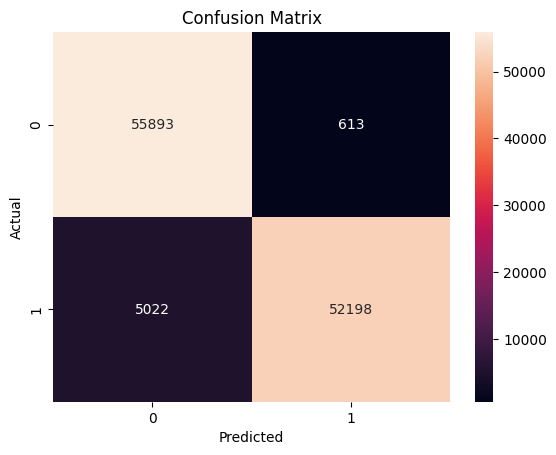

In [74]:
# Testing the model
y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [73]:
# Calculate additional metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))

Precision: 0.99
Recall: 0.91
F1-score: 0.95


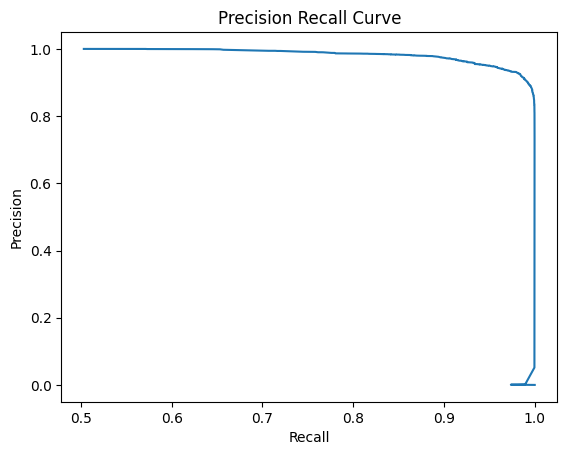

In [75]:
#Predicting proba
y_pred_prob = rf.predict_proba(X_test)[:,1]

# Generate precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

## XGBOOST

In [76]:
import xgboost as xgb

In [77]:
# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42)

# Fit the model
xgb_model.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Text(0.5, 1.0, 'Confusion Matrix')

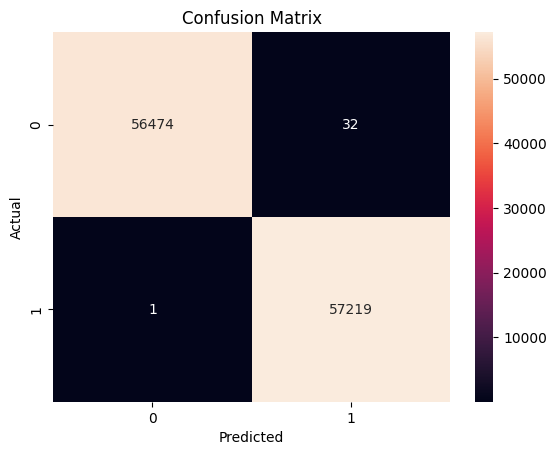

In [78]:
# Make predictions
y_pred = xgb_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [79]:
# Calculate additional metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))

Precision: 1.00
Recall: 1.00
F1-score: 1.00


In [80]:
import pickle

# Save the XGBoost model to a file
filename = 'xgboost_model_fraud_detection.pkl'
pickle.dump(xgb_model, open(filename, 'wb'))

# CONCLUSION:

The best model was XGBoost, which achieved an f1 score of 1.0


